# 1. Yahoo Finance Data

In [112]:
# import yahoo finance library
# and get daily stock price data of dow jones index, s&p 500 index, and nasdaq, and each sector index
# from the 1980 to today
# and inser data into database

import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import sqlite3
import os
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# get the dow jones index, s&p 500 index, and nasdaq index
# from 1980 to today
# and insert data into database

def get_data(ticker_code, index_name, peroiod="max"):
    # get the data
    data = yf.Ticker(ticker_code)
    data = data.history(period=peroiod)
    data.insert(0, "code", index_name)

    ## change column name into small letters
    data = data.rename(columns={"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume", "Dividends": "dividends", "Stock Splits": "stock_splits"})
    data.index.name = "date"

    ## change data format
    data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
    data.index = data.index.strftime('%Y-%m-%d')
    data["open"] = data["open"].astype(float)
    data["high"] = data["high"].astype(float)
    data["low"] = data["low"].astype(float)
    data["close"] = data["close"].astype(float)
    data["volume"] = data["volume"].astype(int)
    data["dividends"] = data["dividends"].astype(float)
    data["stock_splits"] = data["stock_splits"].astype(float)

    ## mange missing data
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.fillna(0)
    data = data.round(2)

    return data


# us stock indexes code: dow jones, s&p 500, nasdaq, russell 2000
# us stock sector indexes code: information technology, health care, consumer discretionary, consumer staples, energy, financials, industrials, materials, real estate, utilities
# us stock sector indexes code: XLK, XLV, XLY, XLP, XLE, XLF, XLI, XLB, XLRE, XLU

def get_index_data(codes=["^DJI", "^GSPC", "^IXIC", "^RUT", "XLK", "XLV", "XLY", "XLP", "XLE", "XLF", "XLI", "XLB", "XLRE", "XLU"],
                   indexes=["dow_jones", "s&p_500", "nasdaq", "russell_2000", "information_technology", "health_care", "consumer_discretionary", "consumer_staples", "energy", "financials", "industrials", "materials", "real_estate", "utilities"]):
    
    index_data_df = pd.DataFrame()

    for code, index in zip(codes, indexes):

        print("start = {}, {}".format(code, index))

        index_data = get_data(code, index)
        index_data_df = pd.concat([index_data_df, index_data])

        print("end = {}, {}".format(code, index))
        

    print(index_data_df.head())
    print(index_data_df.tail())
    print(index_data_df.shape)

    return index_data_df


In [18]:
codes = ["^DJI", "^GSPC", "^IXIC", "^RUT", "XLK", "XLV", "XLY", "XLP", "XLE", "XLF", "XLI", "XLB", "XLRE", "XLU"]
idexes = ["dow_jones", "s&p_500", "nasdaq", "russell_2000", "information_technology", "health_care", "consumer_discretionary", "consumer_staples", "energy", "financials", "industrials", "materials", "real_estate", "utilities"]

# for code, index in zip(codes, idexes):
#     print("start = {}, {}".format(code, index))

index_data_df = get_index_data(codes, idexes)

start = ^DJI, dow_jones
start = ^GSPC, s&p_500
start = ^IXIC, nasdaq
start = ^RUT, russell_2000
start = XLK, information_technology
start = XLV, health_care
start = XLY, consumer_discretionary
start = XLP, consumer_staples
start = XLE, energy
start = XLF, financials
start = XLI, industrials
start = XLB, materials
start = XLRE, real_estate
start = XLU, utilities


# 2. Preprocessing

In [41]:
# Scale the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [64]:
# index_data_df_test = index_data_df.copy()

# index_data_df_test['close'] = scale_data(index_data_df_test[['close']])

# index_data_df_test['close']

# index_data_df_test = scale_data(index_data_df.columns[["close"]].fillna(0))
# index_data_df_test.info()

# 3. Basic Analysis

In [33]:
index_data_df['code'].unique().tolist()

['dow_jones',
 's&p_500',
 'nasdaq',
 'russell_2000',
 'information_technology',
 'health_care',
 'consumer_discretionary',
 'consumer_staples',
 'energy',
 'financials',
 'industrials',
 'materials',
 'real_estate',
 'utilities']

In [103]:
# daily returns

def get_daily_returns(df):
    
    # get the unique index names
    indexes = df['code'].unique().tolist()
    # print(indexes)

    # get daily returns from close price in the dataframe and insert into the dataframe new column named 'daily_rets'

    for index_name in indexes:
        df.loc[df["code"] == index_name, "daily_rets"] = df.loc[df["code"] == index_name]["close"].pct_change()
        df['daily_rets'] = df['daily_rets'].replace([np.inf, -np.inf], np.nan)
        df['daily_rets'] = df['daily_rets'].fillna(0)

    # plot the returns
    for index_name in indexes:

        # plot the returns of each index
        df.loc[df["code"] == index_name]["daily_rets"].plot()
        plt.xlabel("date")
        plt.ylabel("daily returns")
        plt.title(index_name)
        plt.show()

    return df

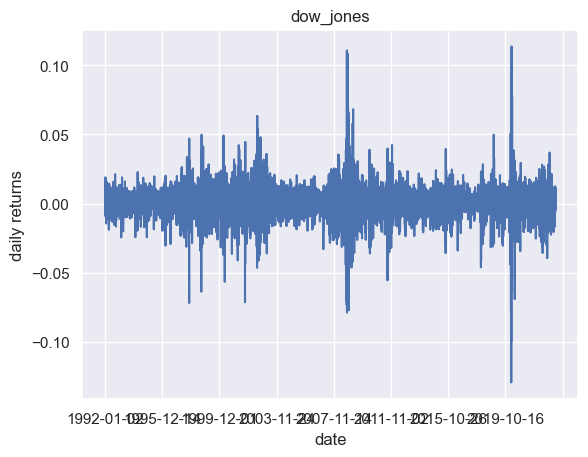

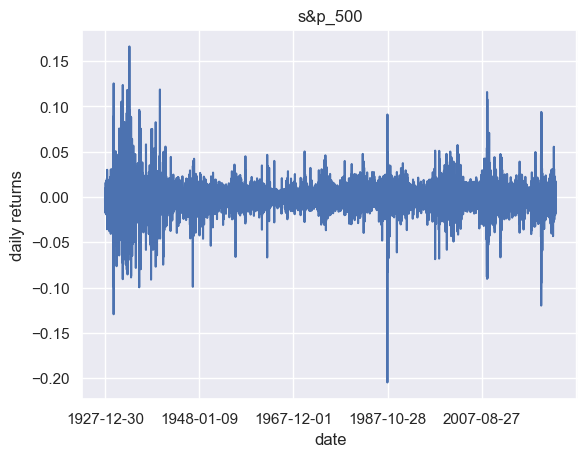

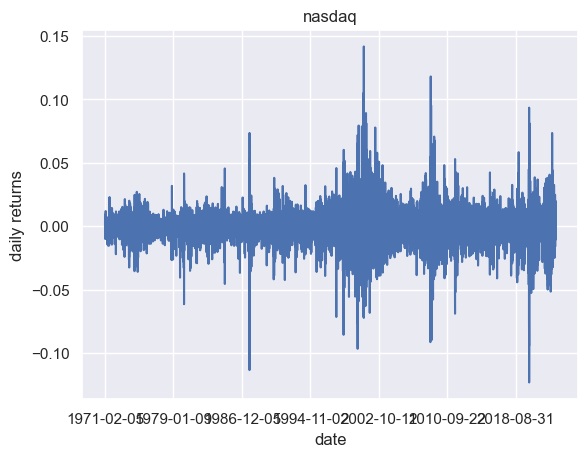

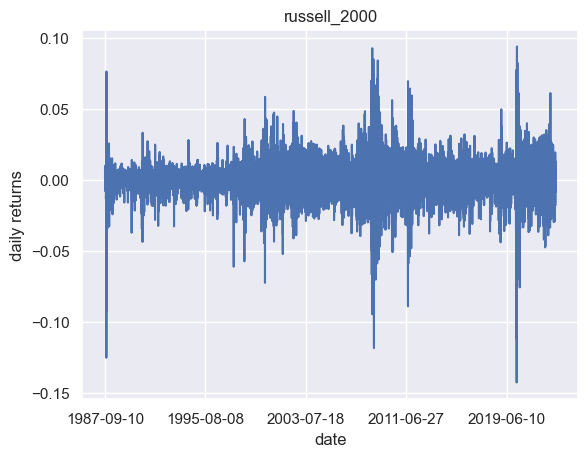

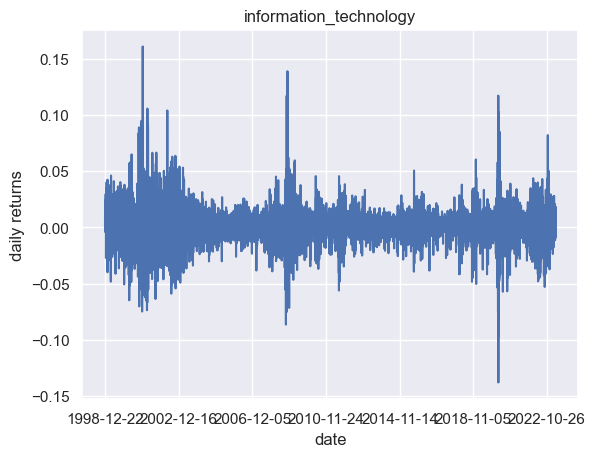

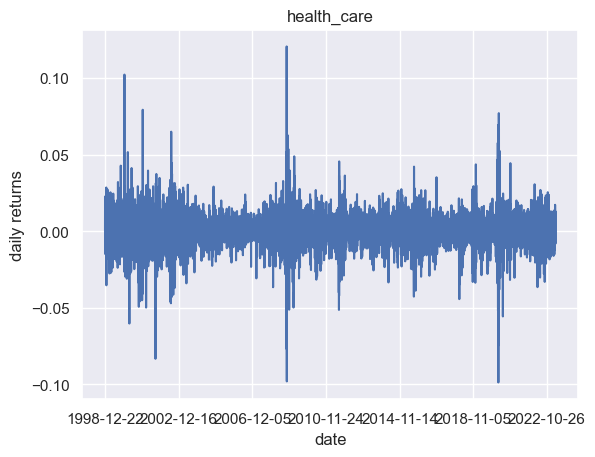

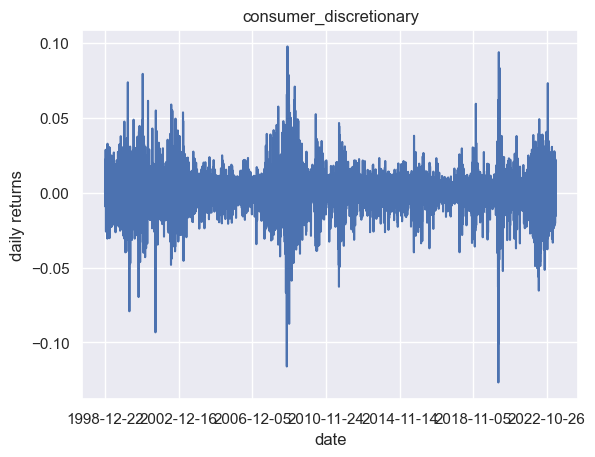

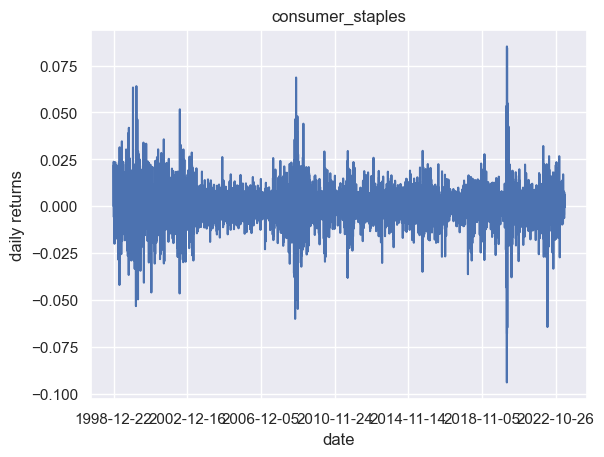

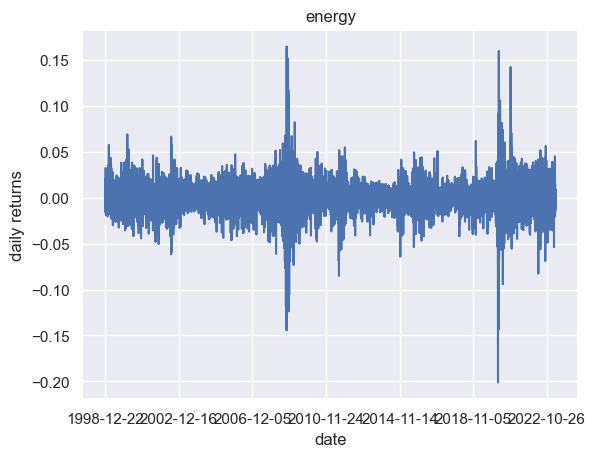

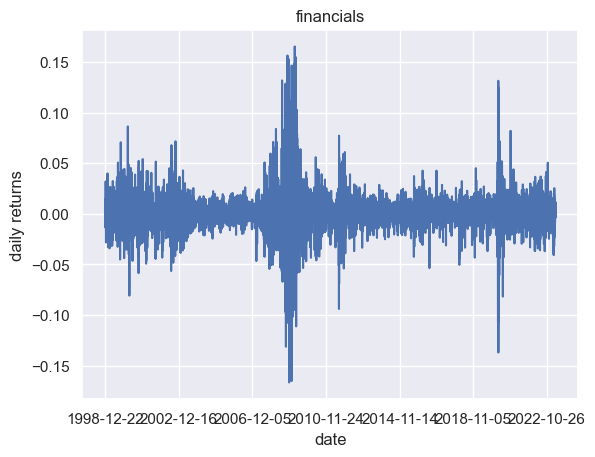

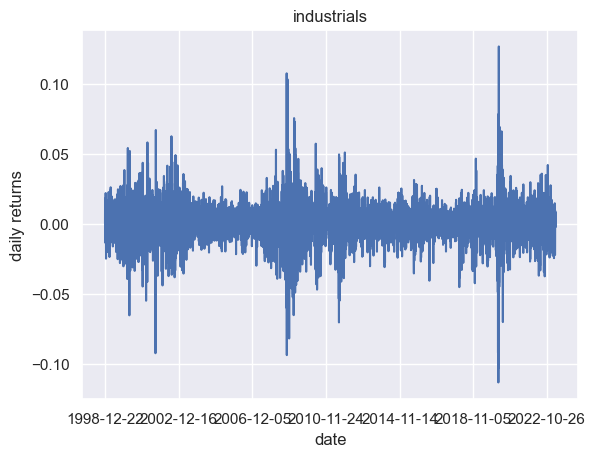

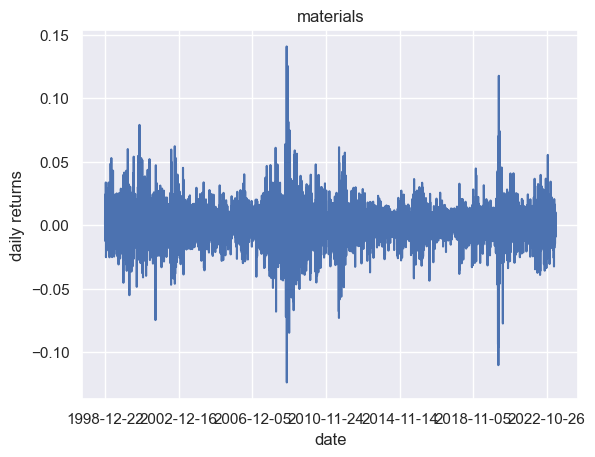

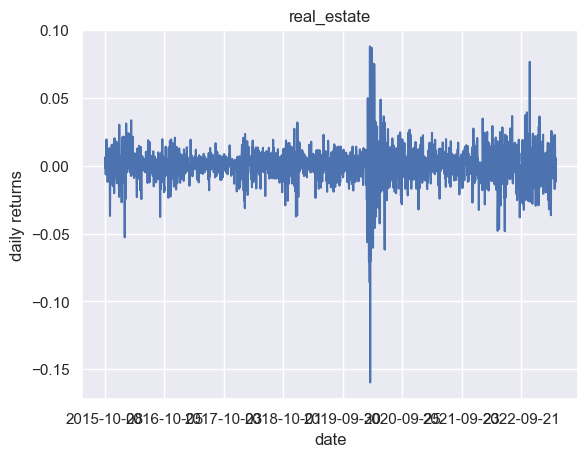

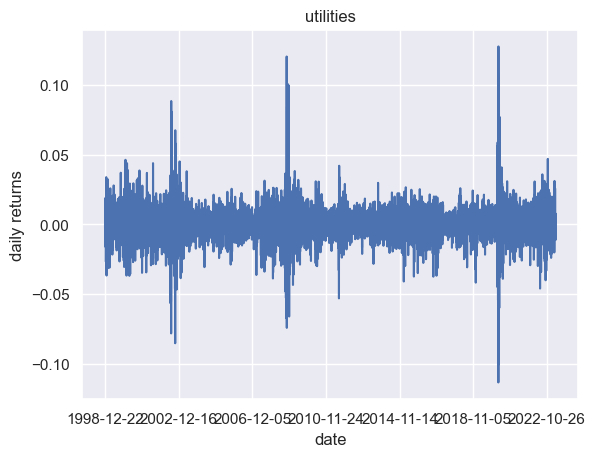

,code,open,high,low,close,volume,dividends,stock_splits,Capital Gains,daily_rets
date,,,,,,,,,,
1992-01-02,dow_jones,3152.10,3172.63,3139.31,3172.40,23550000,0.0,0.0,NaN,0.000000
1992-01-03,dow_jones,3172.40,3210.64,3165.92,3201.50,23620000,0.0,0.0,NaN,0.009173
1992-01-06,dow_jones,3201.50,3213.33,3191.86,3200.10,27280000,0.0,0.0,NaN,-0.000437
1992-01-07,dow_jones,3200.10,3210.20,3184.48,3204.80,25510000,0.0,0.0,NaN,0.001469
1992-01-08,dow_jones,3204.80,3229.20,3185.82,3203.90,29040000,0.0,0.0,NaN,-0.000281
...,...,...,...,...,...,...,...,...,...,...
2023-04-17,utilities,69.01,69.39,68.58,69.27,7806900,0.0,0.0,0.0,0.005516
2023-04-18,utilities,69.30,69.44,68.65,68.91,7783100,0.0,0.0,0.0,-0.005197
2023-04-19,utilities,69.08,69.65,68.98,69.44,10317300,0.0,0.0,0.0,0.007691


In [104]:
index_data_df_rets = get_daily_returns(index_data_df)
index_data_df_rets

In [124]:
# get montly volatility of daily returns of each index

def get_monthly_volatility(df):
        
    # get the unique index names
    indexes = df['code'].unique().tolist()
    # print(indexes)
    
    # get monthly volatility from daily returns in the dataframe and insert into the dataframe new column named 'monthly_vol'
    
    for index_name in indexes:
        df.loc[df["code"] == index_name, "monthly_rolling_vol"] = df.loc[df["code"] == index_name]["daily_rets"].rolling(21).std() * np.sqrt(21)
        df['monthly_rolling_vol'] = df['monthly_rolling_vol'].replace([np.inf, -np.inf], np.nan)
        df['monthly_rolling_vol'] = df['monthly_rolling_vol'].fillna(0)
    
    # plot the volatility
    for index_name in indexes:
    
        # plot the volatility of each index
        df.loc[df["code"] == index_name]["monthly_rolling_vol"].plot()
        plt.xlabel("date")
        plt.ylabel("monthly volatility")
        plt.title(index_name)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return df

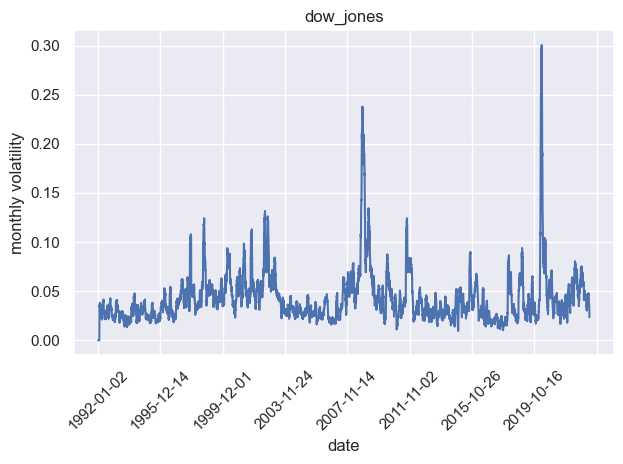

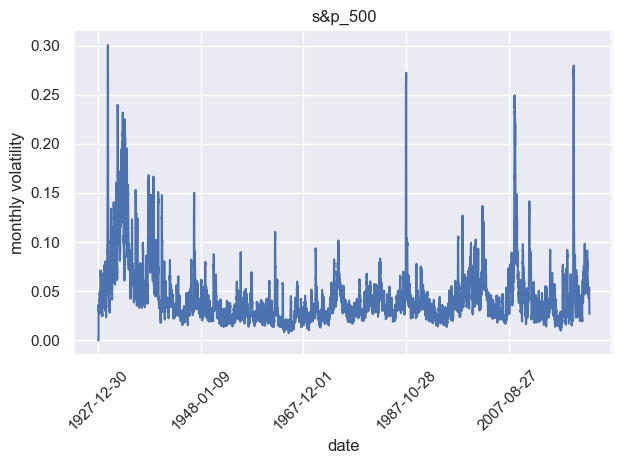

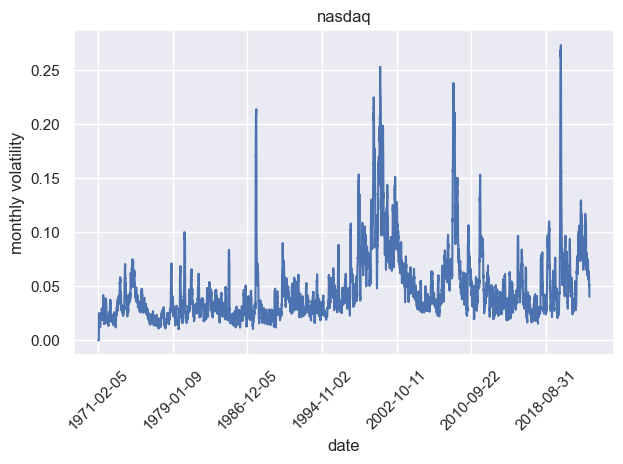

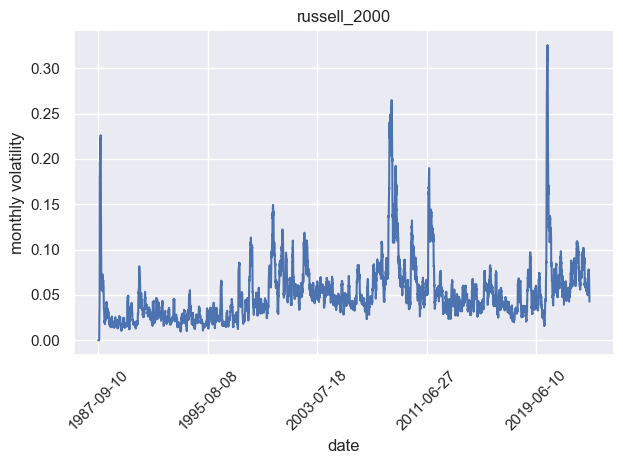

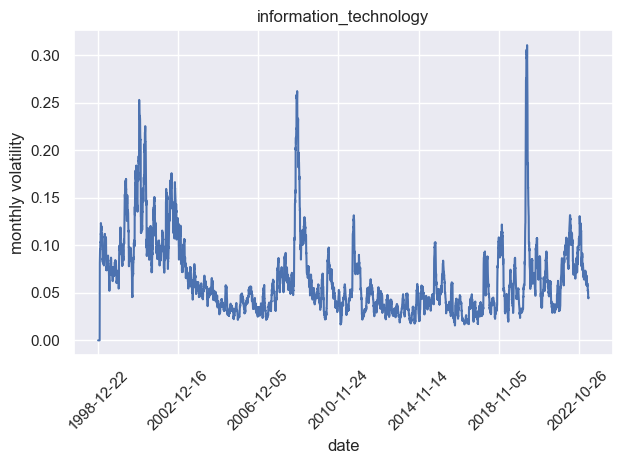

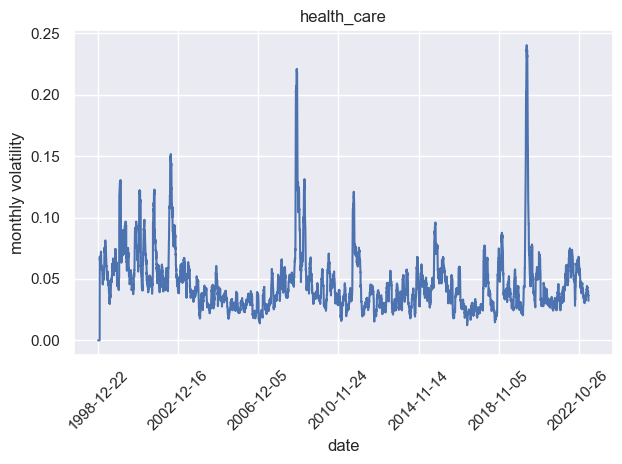

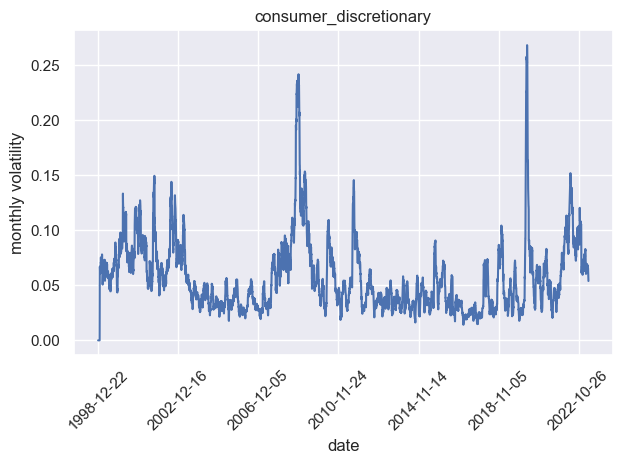

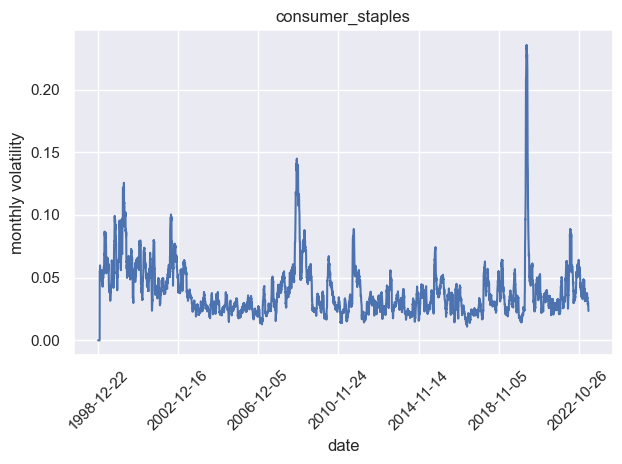

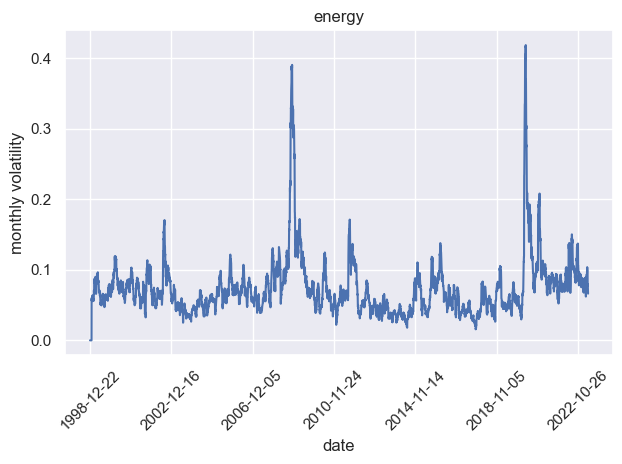

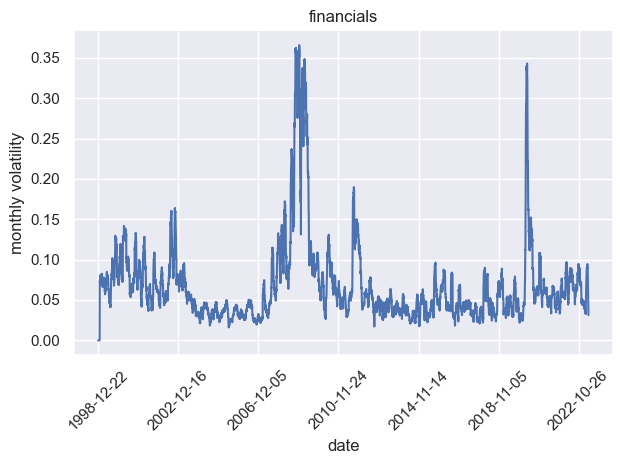

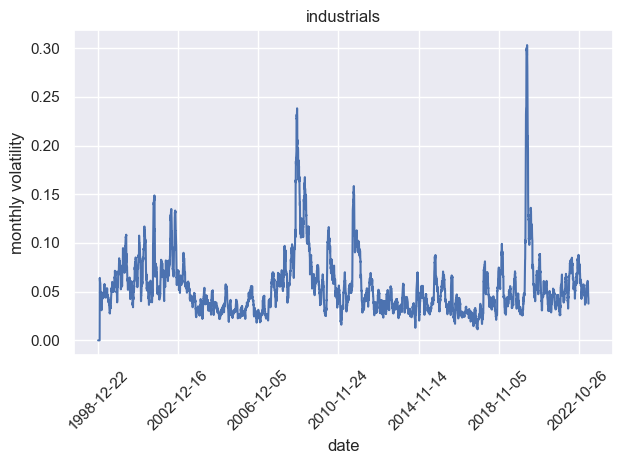

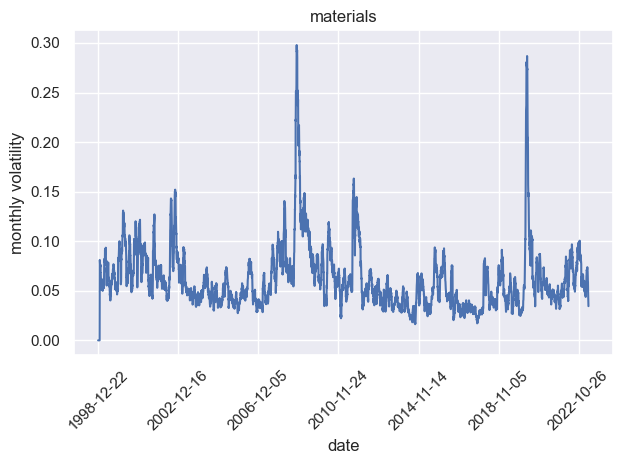

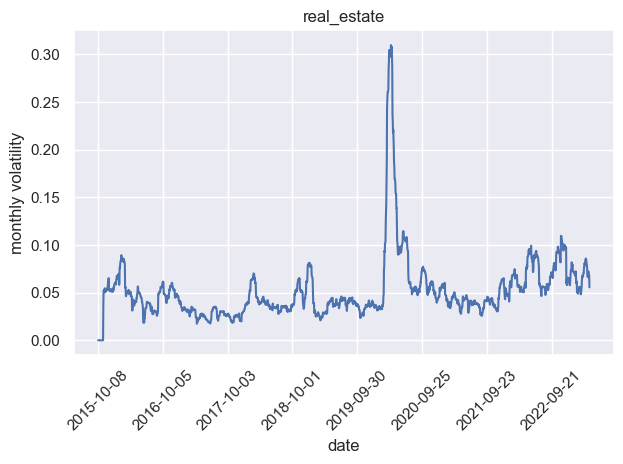

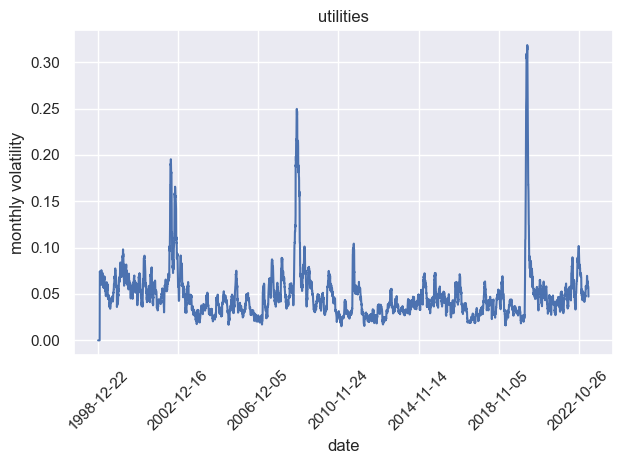

,code,open,high,low,close,volume,dividends,stock_splits,Capital Gains,daily_rets,monthly_rolling_vol
date,,,,,,,,,,,
1992-01-02,dow_jones,3152.10,3172.63,3139.31,3172.40,23550000,0.0,0.0,NaN,0.000000,0.000000
1992-01-03,dow_jones,3172.40,3210.64,3165.92,3201.50,23620000,0.0,0.0,NaN,0.009173,0.000000
1992-01-06,dow_jones,3201.50,3213.33,3191.86,3200.10,27280000,0.0,0.0,NaN,-0.000437,0.000000
1992-01-07,dow_jones,3200.10,3210.20,3184.48,3204.80,25510000,0.0,0.0,NaN,0.001469,0.000000
1992-01-08,dow_jones,3204.80,3229.20,3185.82,3203.90,29040000,0.0,0.0,NaN,-0.000281,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,utilities,69.01,69.39,68.58,69.27,7806900,0.0,0.0,0.0,0.005516,0.058175
2023-04-18,utilities,69.30,69.44,68.65,68.91,7783100,0.0,0.0,0.0,-0.005197,0.057432
2023-04-19,utilities,69.08,69.65,68.98,69.44,10317300,0.0,0.0,0.0,0.007691,0.057417


In [125]:
index_data_df_rets = get_monthly_volatility(index_data_df_rets)
index_data_df_rets